## Intelligent Models and Methods of Smart City Digital Ecosystem for Sustainable Development and the Citizen's Quality of Life Improvement

Getting the dependencies up and running.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

Load the dataset

In [3]:
file_pattern = 'sensor_data_*.csv'
csv_files = glob.glob(file_pattern)

if not csv_files:
    print("Error: No CSV files found. Please upload the sensor_data_YYYY-MM-DD.csv files.")
else:
    print(f"Found {len(csv_files)} files: {csv_files}")

    # Load all files into a single DataFrame
    df_list = []
    for file in csv_files:
        temp_df = pd.read_csv(file)
        df_list.append(temp_df)

    df = pd.concat(df_list, ignore_index=True)

Found 7 files: ['sensor_data_2025-03-01.csv', 'sensor_data_2025-03-02.csv', 'sensor_data_2025-03-03.csv', 'sensor_data_2025-03-04.csv', 'sensor_data_2025-03-05.csv', 'sensor_data_2025-03-06.csv', 'sensor_data_2025-03-07.csv']


Converting timestamp to datetime

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

Sort by time for order

In [5]:
df = df.sort_values('timestamp')

Set timestamp as index

In [6]:
df.set_index('timestamp', inplace=True)

print(f"\nTotal Records Loaded: {len(df)}")
print(df.head())


Total Records Loaded: 120960
                     temperature  humidity   light    pH  \
timestamp                                                  
2025-03-01 00:00:00        24.69     52.66  118.65  6.68   
2025-03-01 00:00:05        21.89     50.18  801.71  7.29   
2025-03-01 00:00:10        23.88     48.01  682.39  7.66   
2025-03-01 00:00:15        20.42     56.73  146.05  7.77   
2025-03-01 00:00:20        20.79     41.54  106.87  7.77   

                     electrical_conductivity  
timestamp                                     
2025-03-01 00:00:00                    0.996  
2025-03-01 00:00:05                    1.044  
2025-03-01 00:00:10                    1.354  
2025-03-01 00:00:15                    0.519  
2025-03-01 00:00:20                    1.900  


Basic Statistics (Mean, Min, Max, Variance)

Compute summary statistics

In [7]:
stats = df.describe().T[['mean', 'min', 'max']]
stats['variance'] = df.var()

print("\n--- Sensor Summary Statistics ---")
print(stats)
# Save statistics to CSV for reference in README
stats.to_csv('sensor_statistics.csv')



--- Sensor Summary Statistics ---
                               mean    min     max      variance
temperature               22.500301   20.0   25.00      2.079780
humidity                  50.026163   40.0   60.00     33.255800
light                    549.103790  100.0  999.99  67457.729719
pH                         7.000135    6.0    8.00      0.332774
electrical_conductivity    1.249303    0.5    2.00      0.187840


Exploratory Data Analysis (Visualization)

Setting visual style

In [8]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

Trends over time resampled to hours

C:\Users\Immanuel\AppData\Local\Temp\ipykernel_15668\2179037796.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').mean()


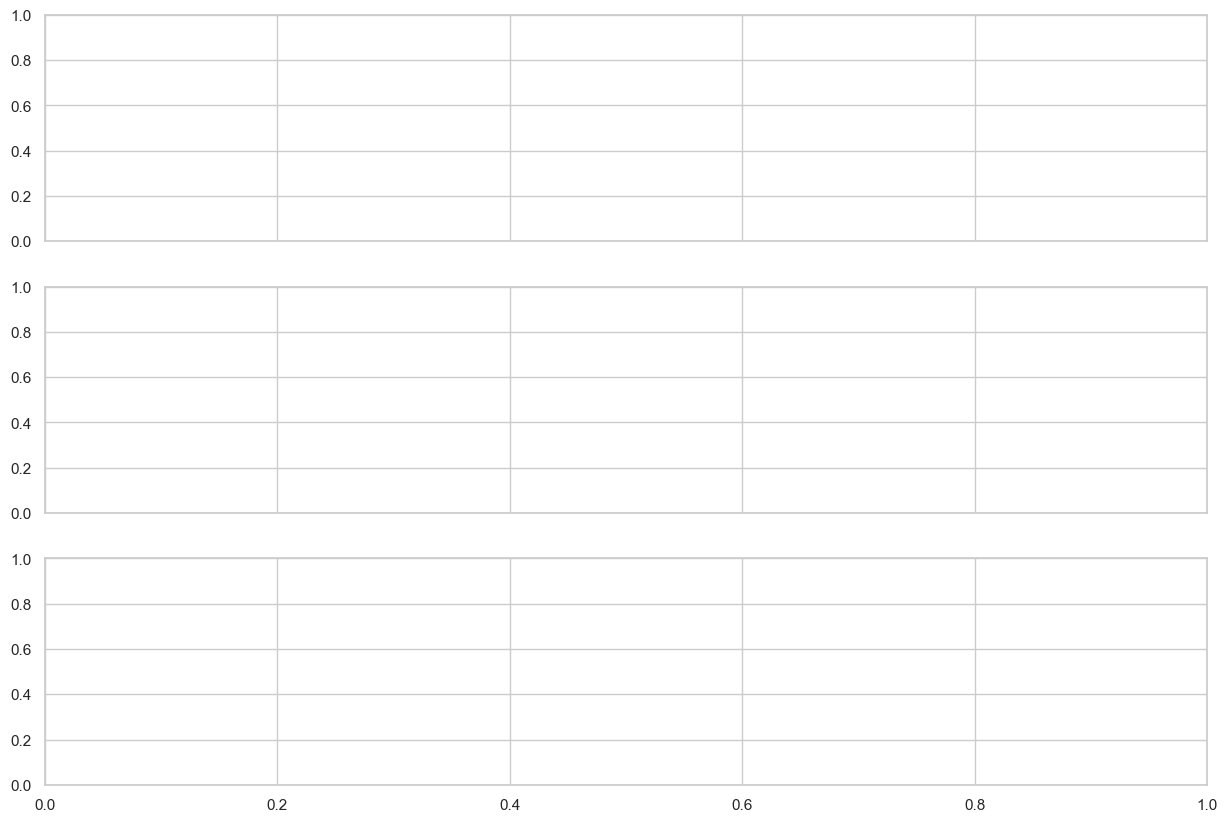

In [9]:
df_hourly = df.resample('H').mean()

fig, axes = plt.subplots(3, 1, sharex=True)

Temperature trend

In [10]:
sns.lineplot(data=df_hourly, x=df_hourly.index, y='temperature', ax=axes[0], color='tab:red')
axes[0].set_title('Weekly Temperature Trend (Hourly Avg)')
axes[0].set_ylabel('Temp (°C)')

Text(4.444444444444459, 0.5, 'Temp (°C)')

Humidity trend

In [11]:
sns.lineplot(data=df_hourly, x=df_hourly.index, y='humidity', ax=axes[1], color='tab:blue')
axes[1].set_title('Weekly Humidity Trend (Hourly Avg)')
axes[1].set_ylabel('Humidity (%)')

Text(4.444444444444459, 0.5, 'Humidity (%)')

Light trend

In [12]:
sns.lineplot(data=df_hourly, x=df_hourly.index, y='light', ax=axes[2], color='tab:orange')
axes[2].set_title('Weekly Light Intensity Trend (Hourly Avg)')
axes[2].set_ylabel('Light (Lux)')

plt.tight_layout()
plt.savefig('trends_plot.png') # Save chart for README
plt.show()

<Figure size 1500x1000 with 0 Axes>

Correlation Heatmap to check for relationships

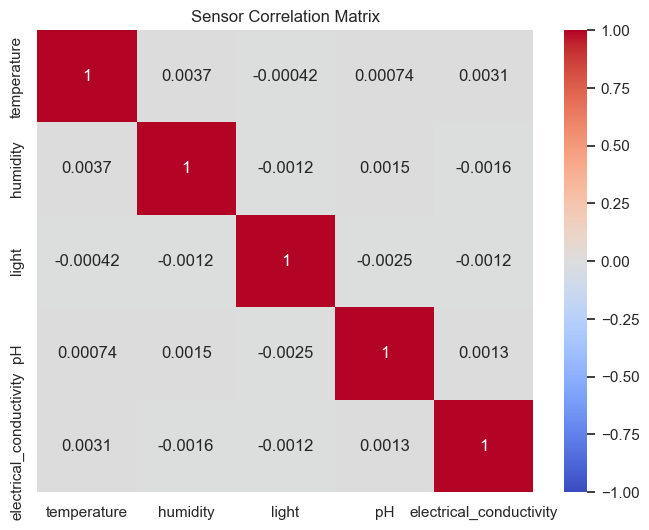

In [13]:
plt.figure(figsize=(8, 6))
correlation_matrix = df[['temperature', 'humidity', 'light', 'pH', 'electrical_conductivity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Sensor Correlation Matrix')
plt.savefig('correlation_heatmap.png')
plt.show()

Day vs Night pattern analysis

C:\Users\Immanuel\AppData\Local\Temp\ipykernel_15668\3817495959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='hour', y='light', palette='viridis')


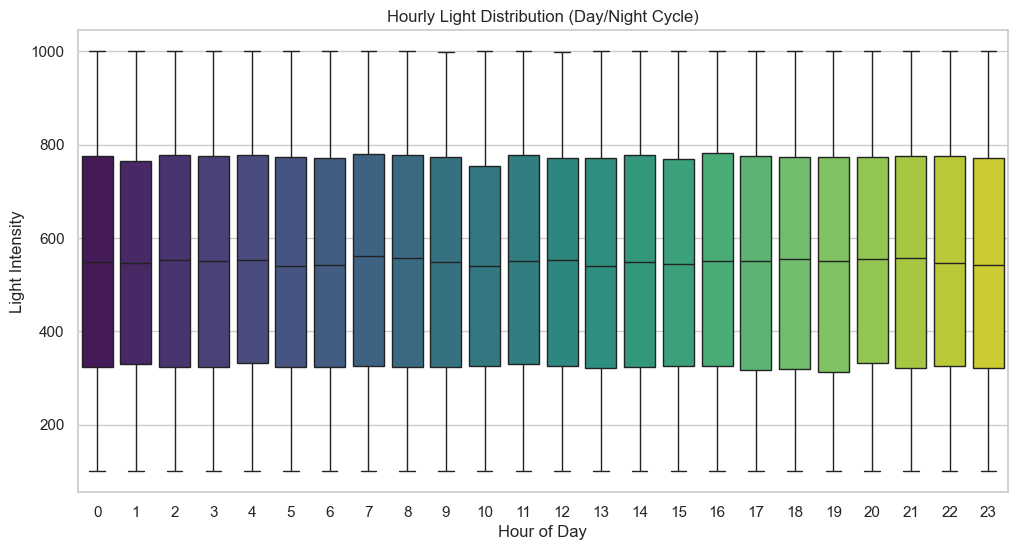

In [14]:
df['hour'] = df.index.hour

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='light', palette='viridis')
plt.title('Hourly Light Distribution (Day/Night Cycle)')
plt.xlabel('Hour of Day')
plt.ylabel('Light Intensity')
plt.savefig('day_night_cycle.png')
plt.show()